In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise
import matplotlib.pyplot as plt

In [2]:
X_train = np.load('Data/Train/X.npy')
X_prime_train = np.load('Data/Train/X_prime.npy')
feature_info_train = np.load('Data/Train/feature_information.npy')

In [3]:
# trainDataTrue = pd.DataFrame(data=X_train)
trainData = pd.DataFrame(data=X_prime_train)
print(trainData.shape)
trainData.head()

(30162, 106)


,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,0.301370,0.000000,0.8,0.02174,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.452055,0.047277,0.8,0.00000,0.0,0.122449,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.287671,0.137244,0.0,0.00000,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.000000,0.150212,0.4,0.00000,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.000000,0.220703,0.8,0.00000,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X_test = np.load('Data/Test/X.npy')
X_prime_test = np.load('Data/Test/X_prime.npy')
feature_info_test = np.load('Data/Test/feature_information.npy')

In [5]:
# testDataTrue = pd.DataFrame(data=X_test)
testData = pd.DataFrame(data=X_prime_test)
testData.head()

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,0.109589,0.144430,0.400000,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.287671,0.051677,0.533333,0.000000,0.0,0.500000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.150685,0.219011,0.733333,0.000000,0.0,0.397959,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.369863,0.099418,0.000000,0.076881,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.000000,0.125398,0.000000,0.000000,0.0,0.295918,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [6]:
categoricalFeatures = [[i for i in range(6,13)],
                 [i for i in range(13,29)],
                 [i for i in range(29,36)],
                 [i for i in range(36,50)],
                 [i for i in range(50,56)],
                 [i for i in range(56,61)],
                 [i for i in range(61,63)],
                 [i for i in range(63,104)],
                 [i for i in range(104,106)]]
                 
print(categoricalFeatures)

[[6, 7, 8, 9, 10, 11, 12], [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28], [29, 30, 31, 32, 33, 34, 35], [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [50, 51, 52, 53, 54, 55], [56, 57, 58, 59, 60], [61, 62], [63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103], [104, 105]]


In [7]:
isFeatureMissingTrain = pd.DataFrame(data = feature_info_train)
isFeatureMissingTrain.head()

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0


In [8]:
isFeatureMissingTest = pd.DataFrame(data = feature_info_test)
isFeatureMissingTest.head()

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [9]:
class knnModel:
    
    def __init__(self, trainData, isFeatureMissingTrain, testData, isFeatureMissingTest, categoricalFeatures, n = 5):
        self.features = isFeatureMissingTrain.columns
        self.trainData = trainData
        self.testData = testData
        self.num_neighbors = n
        self.categoricalFeatures = categoricalFeatures
        self.isCategorical = [i for _l in self.categoricalFeatures for i in _l]
        self.startIndex = [l[0] for l in self.categoricalFeatures]
        self.endIndex = [l[-1] for l in self.categoricalFeatures]
        
        self.trainData = self.trainData.where(isFeatureMissingTrain > 0)
        self.testData = self.testData.where(isFeatureMissingTest > 0)
    
#     def calculateSimilarity(self, x1, x2):
#         # Not keeping categorical (Hamming) and Euclidean separate
#         simScore = 0
#         for col,val in x1.iteritems():
#             if np.isnan(x1[col]) or np.isnan(x2[col]):
#                 continue
#             else:
#                 simScore += (x1[col] - x2[col])**2
#         return np.sqrt(simScore)

#     def getNeighbors(self, x):
#         sim = [];
#         for index, row in self.trainData.iterrows():
#             simScore = self.calculateSimilarity(row, x)
#             sim.append((index, simScore))
#         sim = sorted(sim, key = lambda x: x[1], reverse=True)
#         return sim
    
    # Using Sklearn similarity for computation speed
    def calculateSimilarity(self, x1, x2):
#         sim = pairwise_distances.cosine_similarity(x1.fillna(0), x2.fillna(0))
        sim = pairwise.nan_euclidean_distances(x1, x2)
        return sim
    
    def predictFeature(self, x, neighbors, n = 5):
        num_neighbors = neighbors.shape[0]
        for k in self.features:
            if np.isnan(x[k]):
                if k in self.startIndex:
                    start = k
                    i = self.startIndex.index(k)
                    end = self.endIndex[i]
                    classes = [0 for i in range(start,end+1)]
                    cnt = 0 
                    for _n in range(num_neighbors):
                        neigh = neighbors[_n]
                        tmp_df = self.trainData.iloc[neigh,start:end+1]
                        if not tmp_df.isnull().any():
                            cnt += 1
                            idx = np.argmax(tmp_df.to_numpy())
                            classes[idx] += 1
                        if cnt == n:
                            break
#                     print("Classes:", classes)
                    maxClass = np.argmax(np.array(classes))
#                     print("maxClass:", maxClass)
                    for i in range(start,end+1):
                        x[i] = 0.0
                    x[maxClass+start] = 1.0
                elif k not in self.isCategorical:
                    sumVal = 0
                    cnt = 0
                    for _n in range(num_neighbors):
                        neigh = neighbors[_n]
                        tmp_df = self.trainData.iloc[neigh,k]
                        if not np.isnan(tmp_df):
                            cnt += 1
                            sumVal += tmp_df
                        if cnt == n:
                            break
                    x[k] = sumVal/n
                else:
                    continue
            else:
                continue
        return x

    def predictData(self):
        i = 0
        sim = np.load('Data/simScores.npy')
#         sim = self.calculateSimilarity(self.testData, self.trainData)
#         np.save('Data/simScores.npy', sim)
#         simScores = np.flip(np.argsort(sim, axis = 1), axis =1)
        simScores = np.argsort(sim, axis = 1)
        for idx, row in self.testData.iterrows():
            neighbors = simScores[idx]
            self.testData.iloc[idx] = self.predictFeature(row, neighbors, self.num_neighbors)
            i += 1
#             if i%1000 == 0:
#                 print("Predicted:", i)
        return 
    
    # Root Mean square
    def calculateTestError(self, testTrueData):
        
        testPredicted = self.testData.to_numpy()
#         print(np.argwhere(np.isnan(testPredicted)))

        diffTest = (testTrueData - testPredicted)**2
        sumTest = np.sum(diffTest, axis = 1)
#         errTest = np.mean(np.sqrt(sumTest))
        errTest = np.sqrt(np.mean(sumTest))

        return errTest   

In [10]:
knn_model = knnModel(trainData, isFeatureMissingTrain, testData, isFeatureMissingTest, categoricalFeatures, n = 5)
knn_model.predictData()

In [11]:
testErr = knn_model.calculateTestError(X_test)
print("Test Error:", testErr)

Test Error: 0.9784093967533113


In [12]:
num_neighbors = [10, 25, 50, 100, 500]
test_err = []

for num in num_neighbors:
    print("Number of nearest neighbors:", num)
    knn_model = knnModel(trainData, isFeatureMissingTrain, testData, isFeatureMissingTest, categoricalFeatures, n = num)
    knn_model.predictData()
    testErr = knn_model.calculateTestError(X_test)
    test_err.append(testErr)
    print("Testing Error:", testErr)
    print("**************************")

Number of nearest neighbors: 10
Testing Error: 0.9780862607243304
**************************
Number of nearest neighbors: 25
Testing Error: 0.9778375631633222
**************************
Number of nearest neighbors: 50
Testing Error: 0.9777416598151448
**************************
Number of nearest neighbors: 100
Testing Error: 0.9776941707930357
**************************
Number of nearest neighbors: 500
Testing Error: 0.9773044095934084
**************************


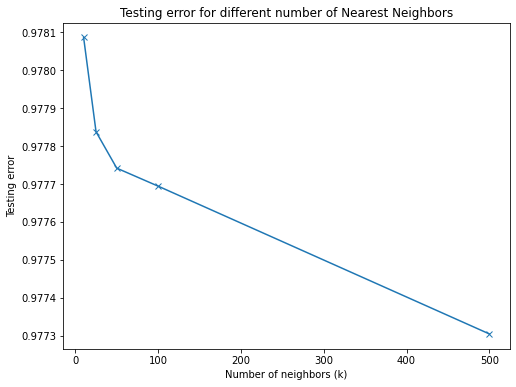

In [13]:
plt.figure(figsize=(8,6))
plt.plot(num_neighbors, test_err, marker='x')
plt.title("Testing error for different number of Nearest Neighbors")
plt.xlabel("Number of neighbors (k)")
plt.ylabel("Testing error")
plt.show()

In [14]:
sim = np.load('Data/simScores.npy')
sim[0]

array([3.62609209, 3.70971088, 3.81322778, ..., 4.23026297, 3.45144323,
       4.25268152])

In [15]:
sim.shape

(15060, 30162)